In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('C:/Users/Administrator/Downloads/housing_data.csv')

In [3]:
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [4]:
housing_data.shape

(1460, 81)

In [5]:
housing_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
housing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


#### 1. Missing Data
- Check for missing values

In [7]:
housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [8]:
housing_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [9]:
#most frequent
housing_data['Alley'].mode()

0    Grvl
Name: Alley, dtype: object

In [10]:
housing_data['Alley'].fillna('Grvl',inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7472\2179388810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['Alley'].fillna('Grvl',inplace = True)


housing_data

#### Univariate Analysis
- Univariate analysis is simplest form of analysis.
- Only one variable is used in visaulization analysis.
- This doesn't deal with relationship plots. It takes data, summarize the data, pattern analysis, trend analysis in data.
- Univariate can be implemented on **numerical_data** or **categorical_data**

In [11]:
df_numerical = housing_data.select_dtypes(include=['number'])

In [12]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [13]:
df_categorical = housing_data.select_dtypes(include=['object'])

In [14]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     588 non-null 

#### 2. Line Plot
- Univariate: Trend analysis
- Bivariate: Data-relationship plot

<Axes: >

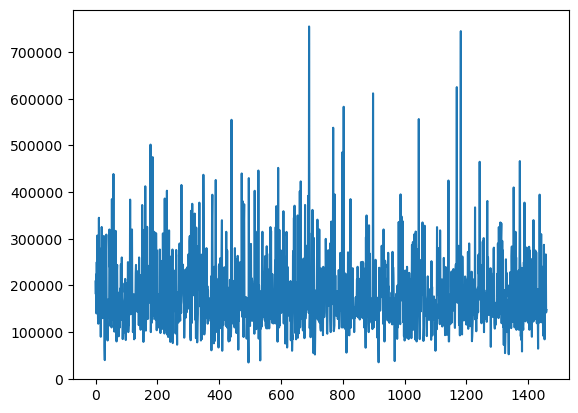

In [15]:
#plot using DataFrame and plot type = 'line'.
df_numerical['SalePrice'].plot(kind='line')

In [16]:
df_numerical['SalePrice'].sort_values().unique()

array([ 34900,  35311,  37900,  39300,  40000,  52000,  52500,  55000,
        55993,  58500,  60000,  61000,  62383,  64500,  66500,  67000,
        68400,  68500,  72500,  73000,  75000,  75500,  76000,  76500,
        78000,  79000,  79500,  79900,  80000,  80500,  81000,  82000,
        82500,  83000,  83500,  84000,  84500,  84900,  85000,  85400,
        85500,  86000,  87000,  87500,  88000,  89000,  89471,  89500,
        90000,  90350,  91000,  91300,  91500,  92000,  92900,  93000,
        93500,  94000,  94500,  94750,  95000,  96500,  97000,  97500,
        98000,  98300,  98600,  99500,  99900, 100000, 101000, 101800,
       102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000,
       105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500,
       107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500,
       109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000,
       114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000,
      

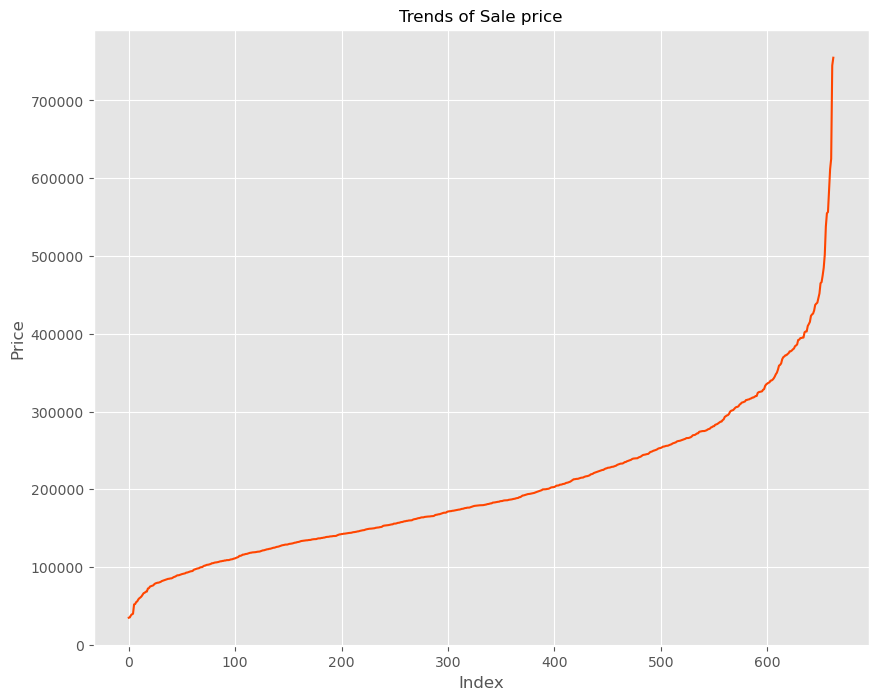

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(df_numerical['SalePrice'].sort_values(ascending=True).unique(), color = 'orangered')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Trends of Sale price', size = 12)
plt.show()


#### 3. Bar Plot
- Univariate or Bivariate plots
- Bar Charts are used with categorical dataset
- Bar plots are used to display counts of unique value for categorical type, Height of bar indicate the count for each categorical value

In [18]:
data_count = df_categorical['MoSold'].value_counts()

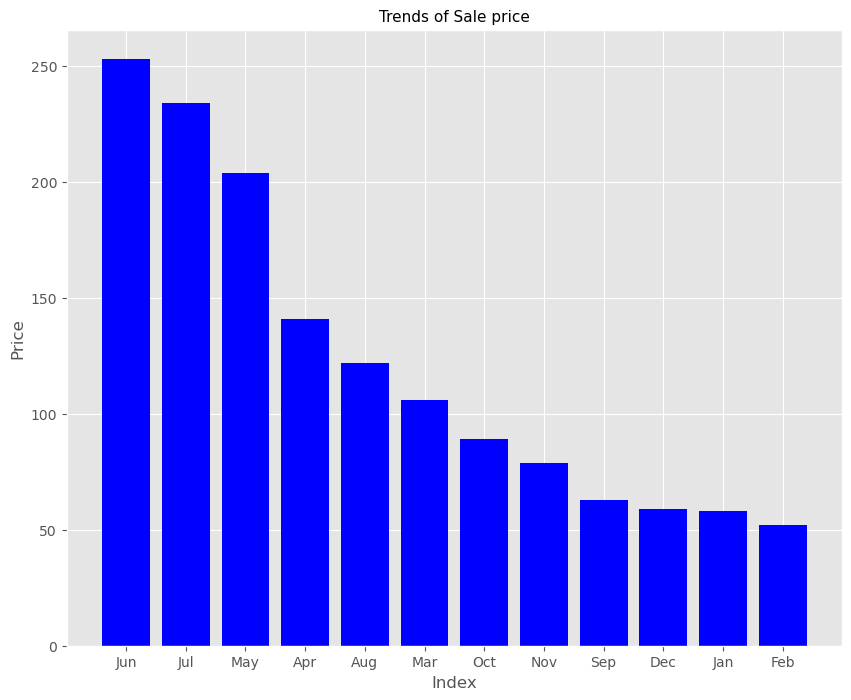

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(x = data_count.index, height = data_count.values, color = 'blue')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Trends of Sale price', size = 11)
plt.show()

<Axes: xlabel='MoSold'>

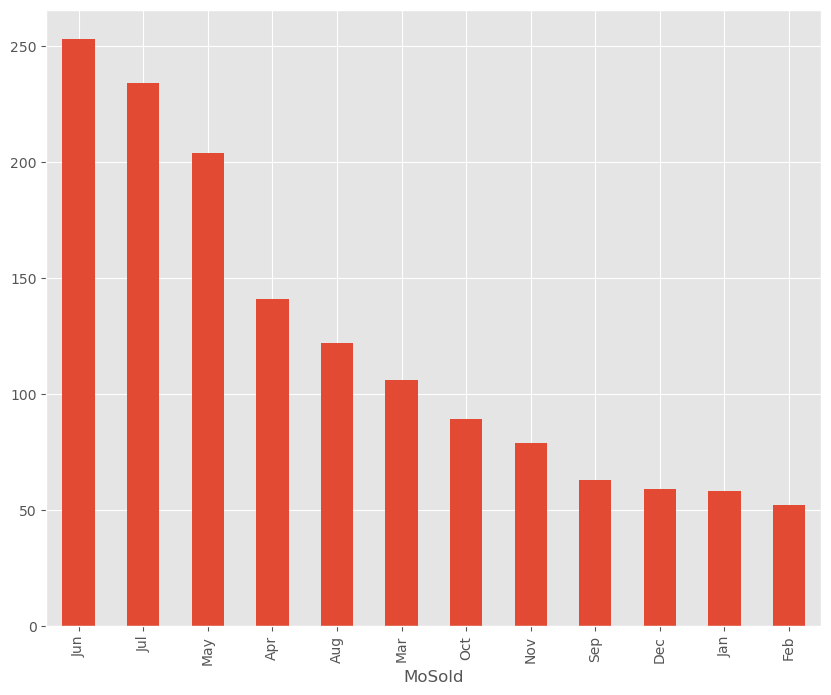

In [20]:
#Pandas bar plot
df_categorical['MoSold'].value_counts().plot(kind="bar", figsize=(10,8))

#### 4. Histogram
- Univariate analysis, continuous data
- Frequency of data in range
- Study of Data distribution / Data Distribution

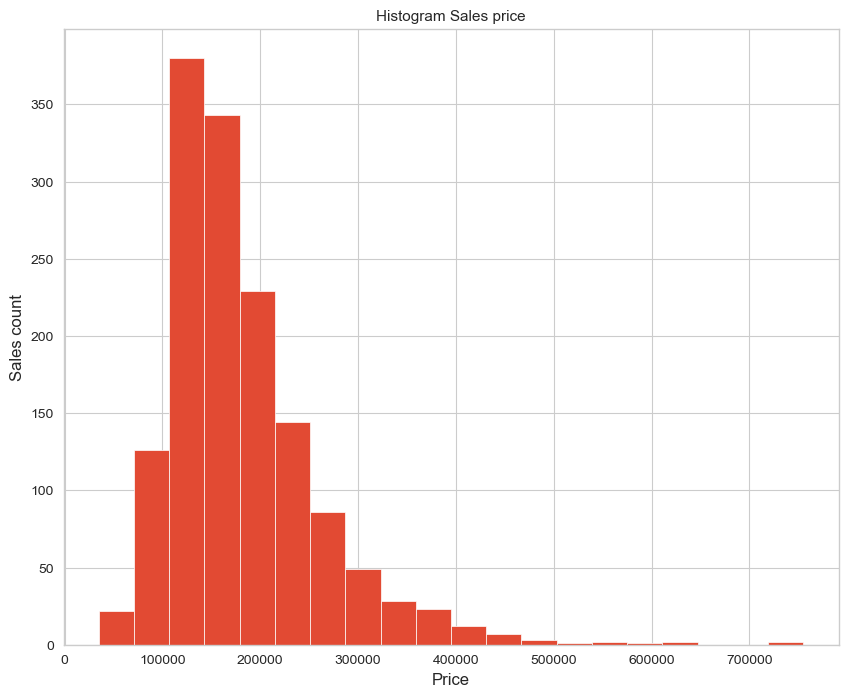

In [21]:
#bins = 20, Indicates 20 equal distributions of numerical data.
sns.set_style('whitegrid')
plt.figure(figsize = (10, 8))
plt.hist(df_numerical['SalePrice'], bins = 20)
plt.xlabel('Price')
plt.ylabel('Sales count')
plt.title('Histogram Sales price', size = 11)
plt.show()

#### SubPlots
- Here one plot will be splitted into multiple plots. Each index position will be occupied by one plot

In [22]:
df_categorical['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [23]:
# display sales price for the column gtl
housing_data['SalePrice'][(df_categorical['LandSlope'] == 'Gtl')]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1382, dtype: int64

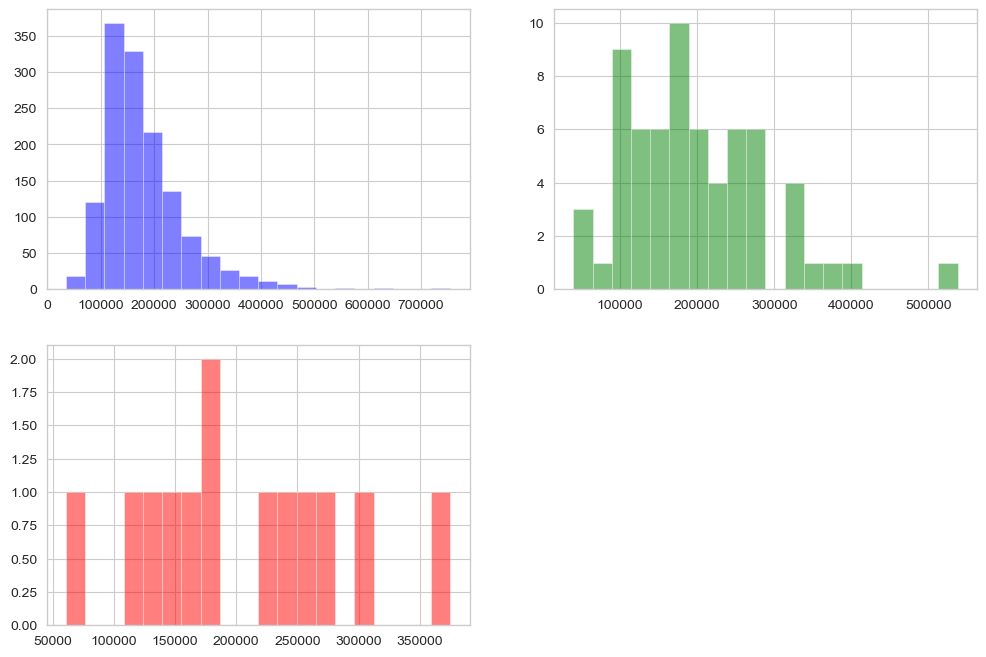

In [24]:
#1 row, 2 column
#alpha : transparency
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.hist(housing_data['SalePrice'][(df_categorical['LandSlope'] == 'Gtl')], bins=20, color='b', alpha=0.5)
plt.subplot(2, 2, 2)
plt.hist(housing_data['SalePrice'][(df_categorical['LandSlope'] == 'Mod')], bins=20, color='g', alpha=0.5)
plt.subplot(2, 2, 3)
plt.hist(housing_data['SalePrice'][(df_categorical['LandSlope'] == 'Sev')], bins=20, color='r', alpha=0.5)
plt.show()


#### 5. Scatter plot
- Indicates Relationship plot or correlation between 2 numerical columns

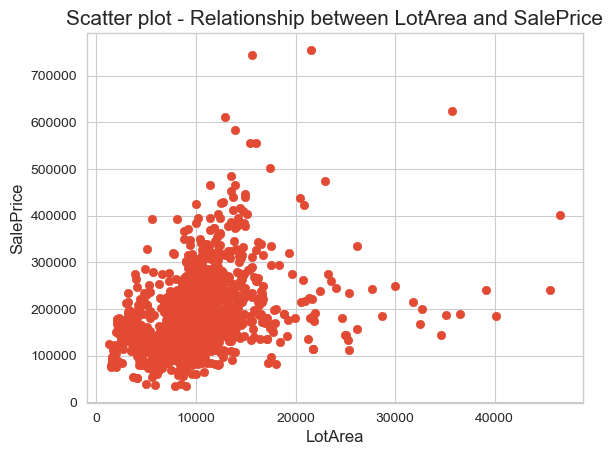

In [25]:
plt.scatter(x = df_numerical[df_numerical['LotArea'] < 50000]['LotArea'], 
            y = df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter plot - Relationship between LotArea and SalePrice',size = 15)
plt.show()

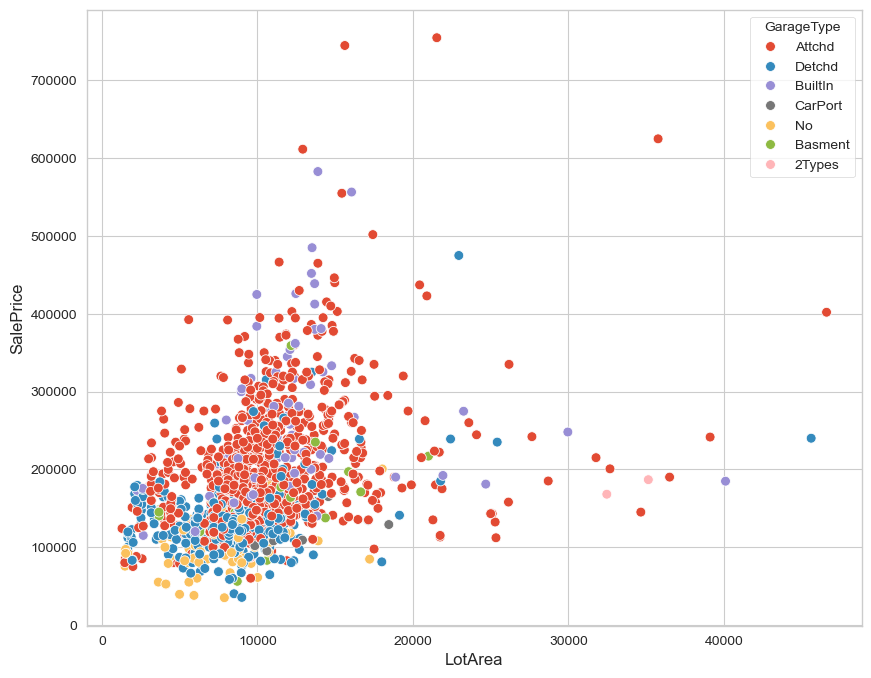

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = df_numerical[df_numerical['LotArea'] < 50000]['LotArea'], 
            y = df_numerical[df_numerical['LotArea'] < 50000]['SalePrice'], hue=df_categorical['GarageType'], s=50)

plt.show()

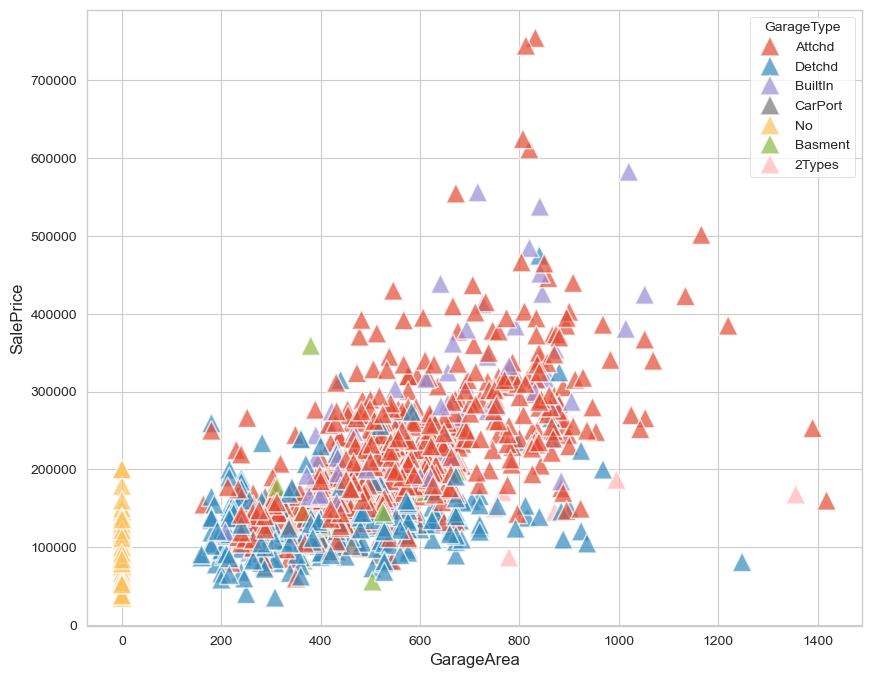

In [27]:
plt.figure(figsize=(10,8))
#s = size of bubble, marker - 's', '^','>','<','*','.','+','d','o'
sns.scatterplot(x = df_numerical['GarageArea'], 
            y = df_numerical['SalePrice'], 
                hue=df_categorical['GarageType'], s=200, marker='^',alpha=0.7)

plt.show()

#### 6. Pie plot
- Frequency distribution plot

In [28]:
df_categorical.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [29]:
df_categorical['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [30]:
df_categorical['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

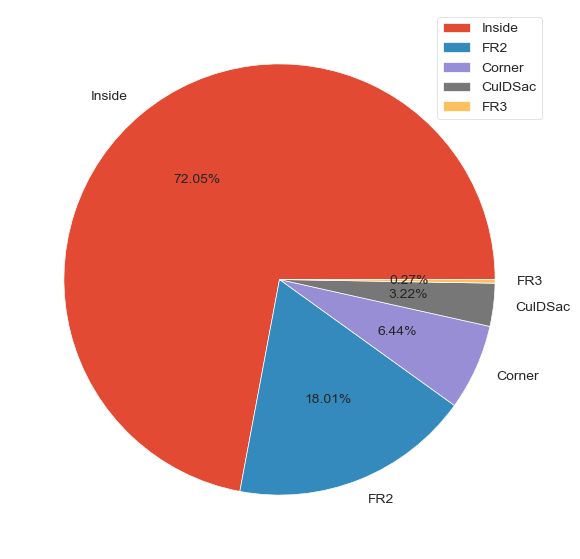

In [31]:
plt.figure(figsize = (7,7))
plt.pie(df_categorical['LotConfig'].value_counts(), autopct = '%0.2f%%', labels=df_categorical['LotConfig'].unique())
plt.legend(loc=1)
plt.show()

#### 7. Kernel Density Estimator (KDE)
- shows Histogram + Density Plot to display distribution of numerical continous data

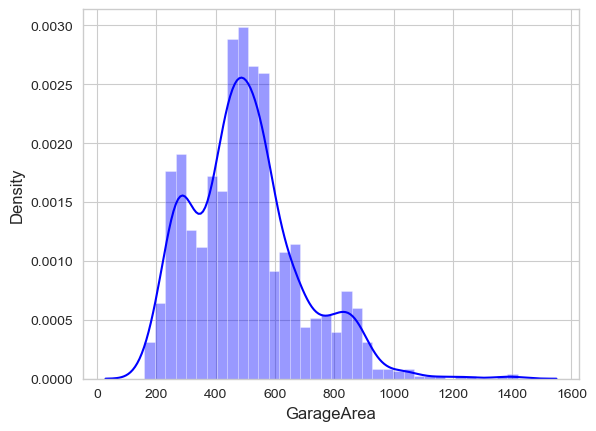

In [32]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_numerical[df_numerical['GarageArea'] > 0]['GarageArea'], color='b')
plt.show()

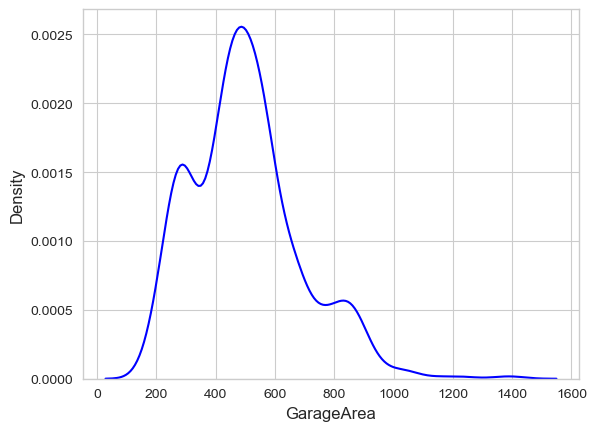

In [33]:
sns.distplot(df_numerical[df_numerical['GarageArea'] > 0]['GarageArea'], color='b', hist= False)
plt.show()

#### 8. Box Plot

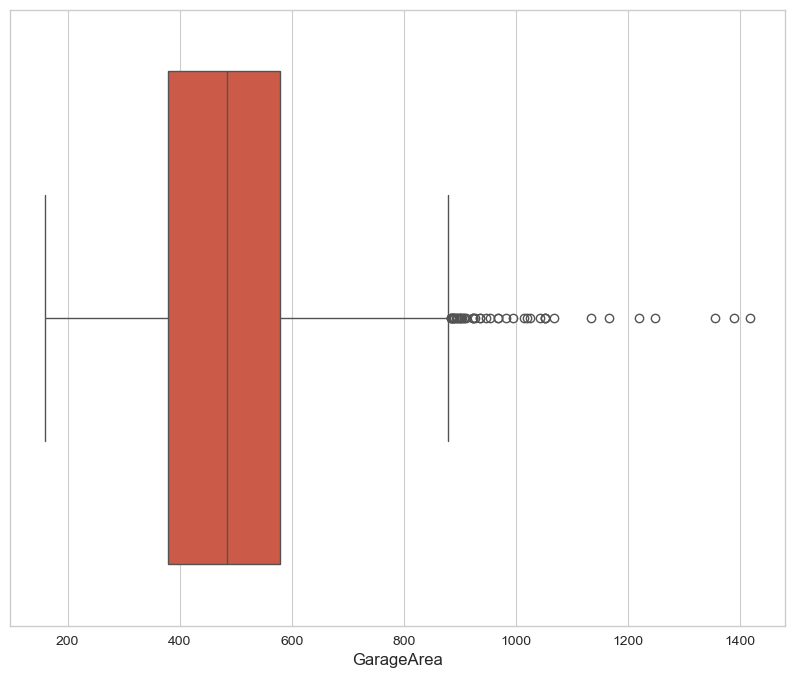

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(df_numerical[df_numerical['GarageArea'] > 0]['GarageArea'], orient = 'h')
plt.show()

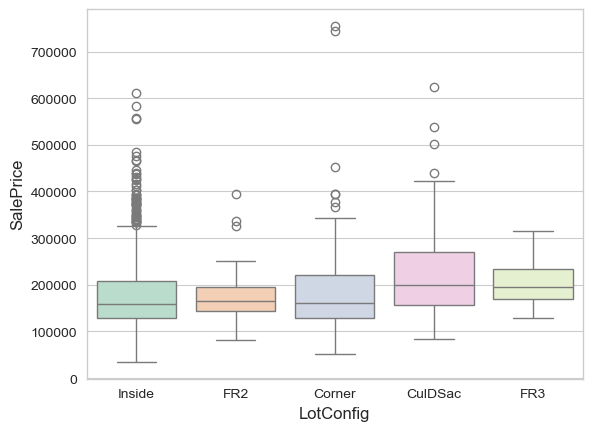

In [58]:
sns.boxplot( x = 'LotConfig', y = 'SalePrice', data = housing_data, hue='LotConfig', palette = 'Pastel2' )
plt.show()

#### 9. Violin Plot

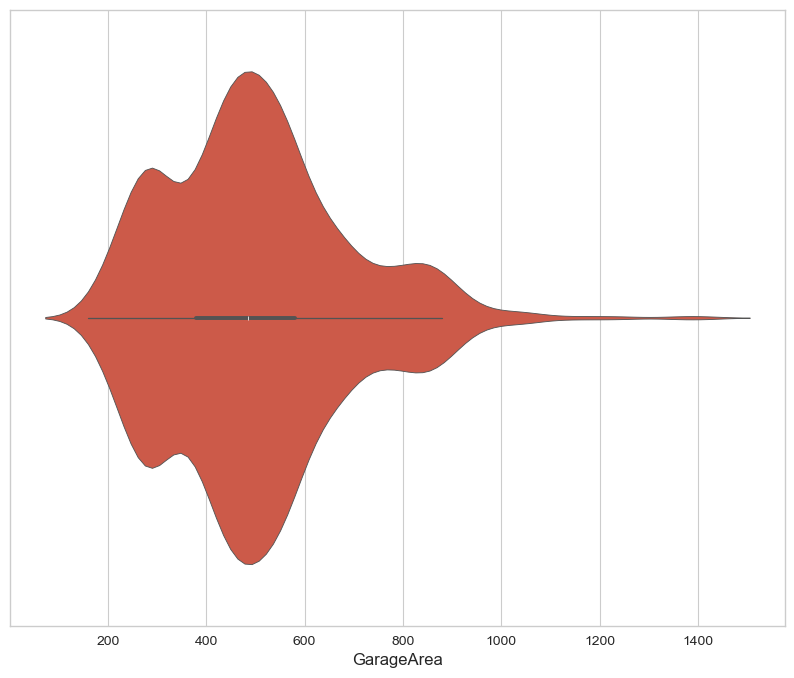

In [46]:
plt.figure(figsize=(10,8))
sns.violinplot(df_numerical[df_numerical['GarageArea'] > 0]['GarageArea'], orient = 'h')
plt.show()

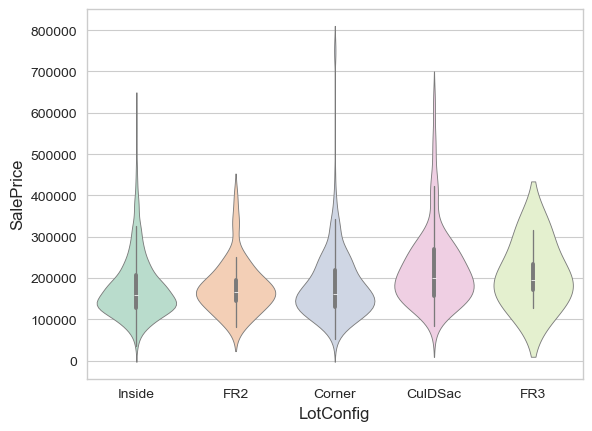

In [59]:
sns.violinplot( x = 'LotConfig', y = 'SalePrice', data = housing_data, hue='LotConfig', palette = 'Pastel2' )
plt.show()

#### 10. Multivariate Plot

In [66]:
df_numerical.corr()[['SalePrice']]

,SalePrice
LotFrontage,0.209624
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378
BsmtUnfSF,0.214479


<Axes: >

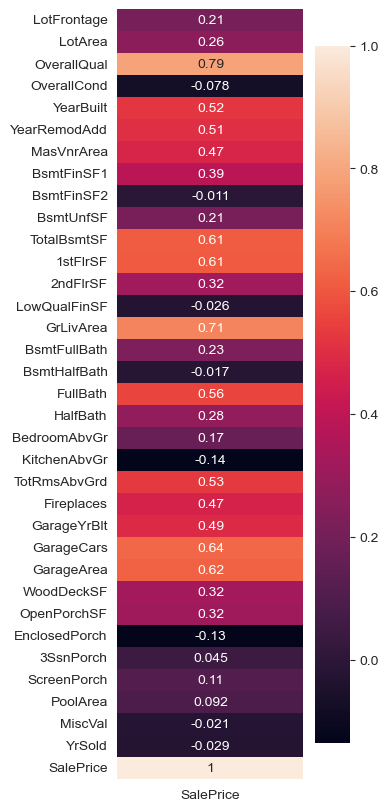

In [69]:
plt.figure(figsize = (3,10))
sns.heatmap(df_numerical.corr()[['SalePrice']], annot = True)

<Axes: >

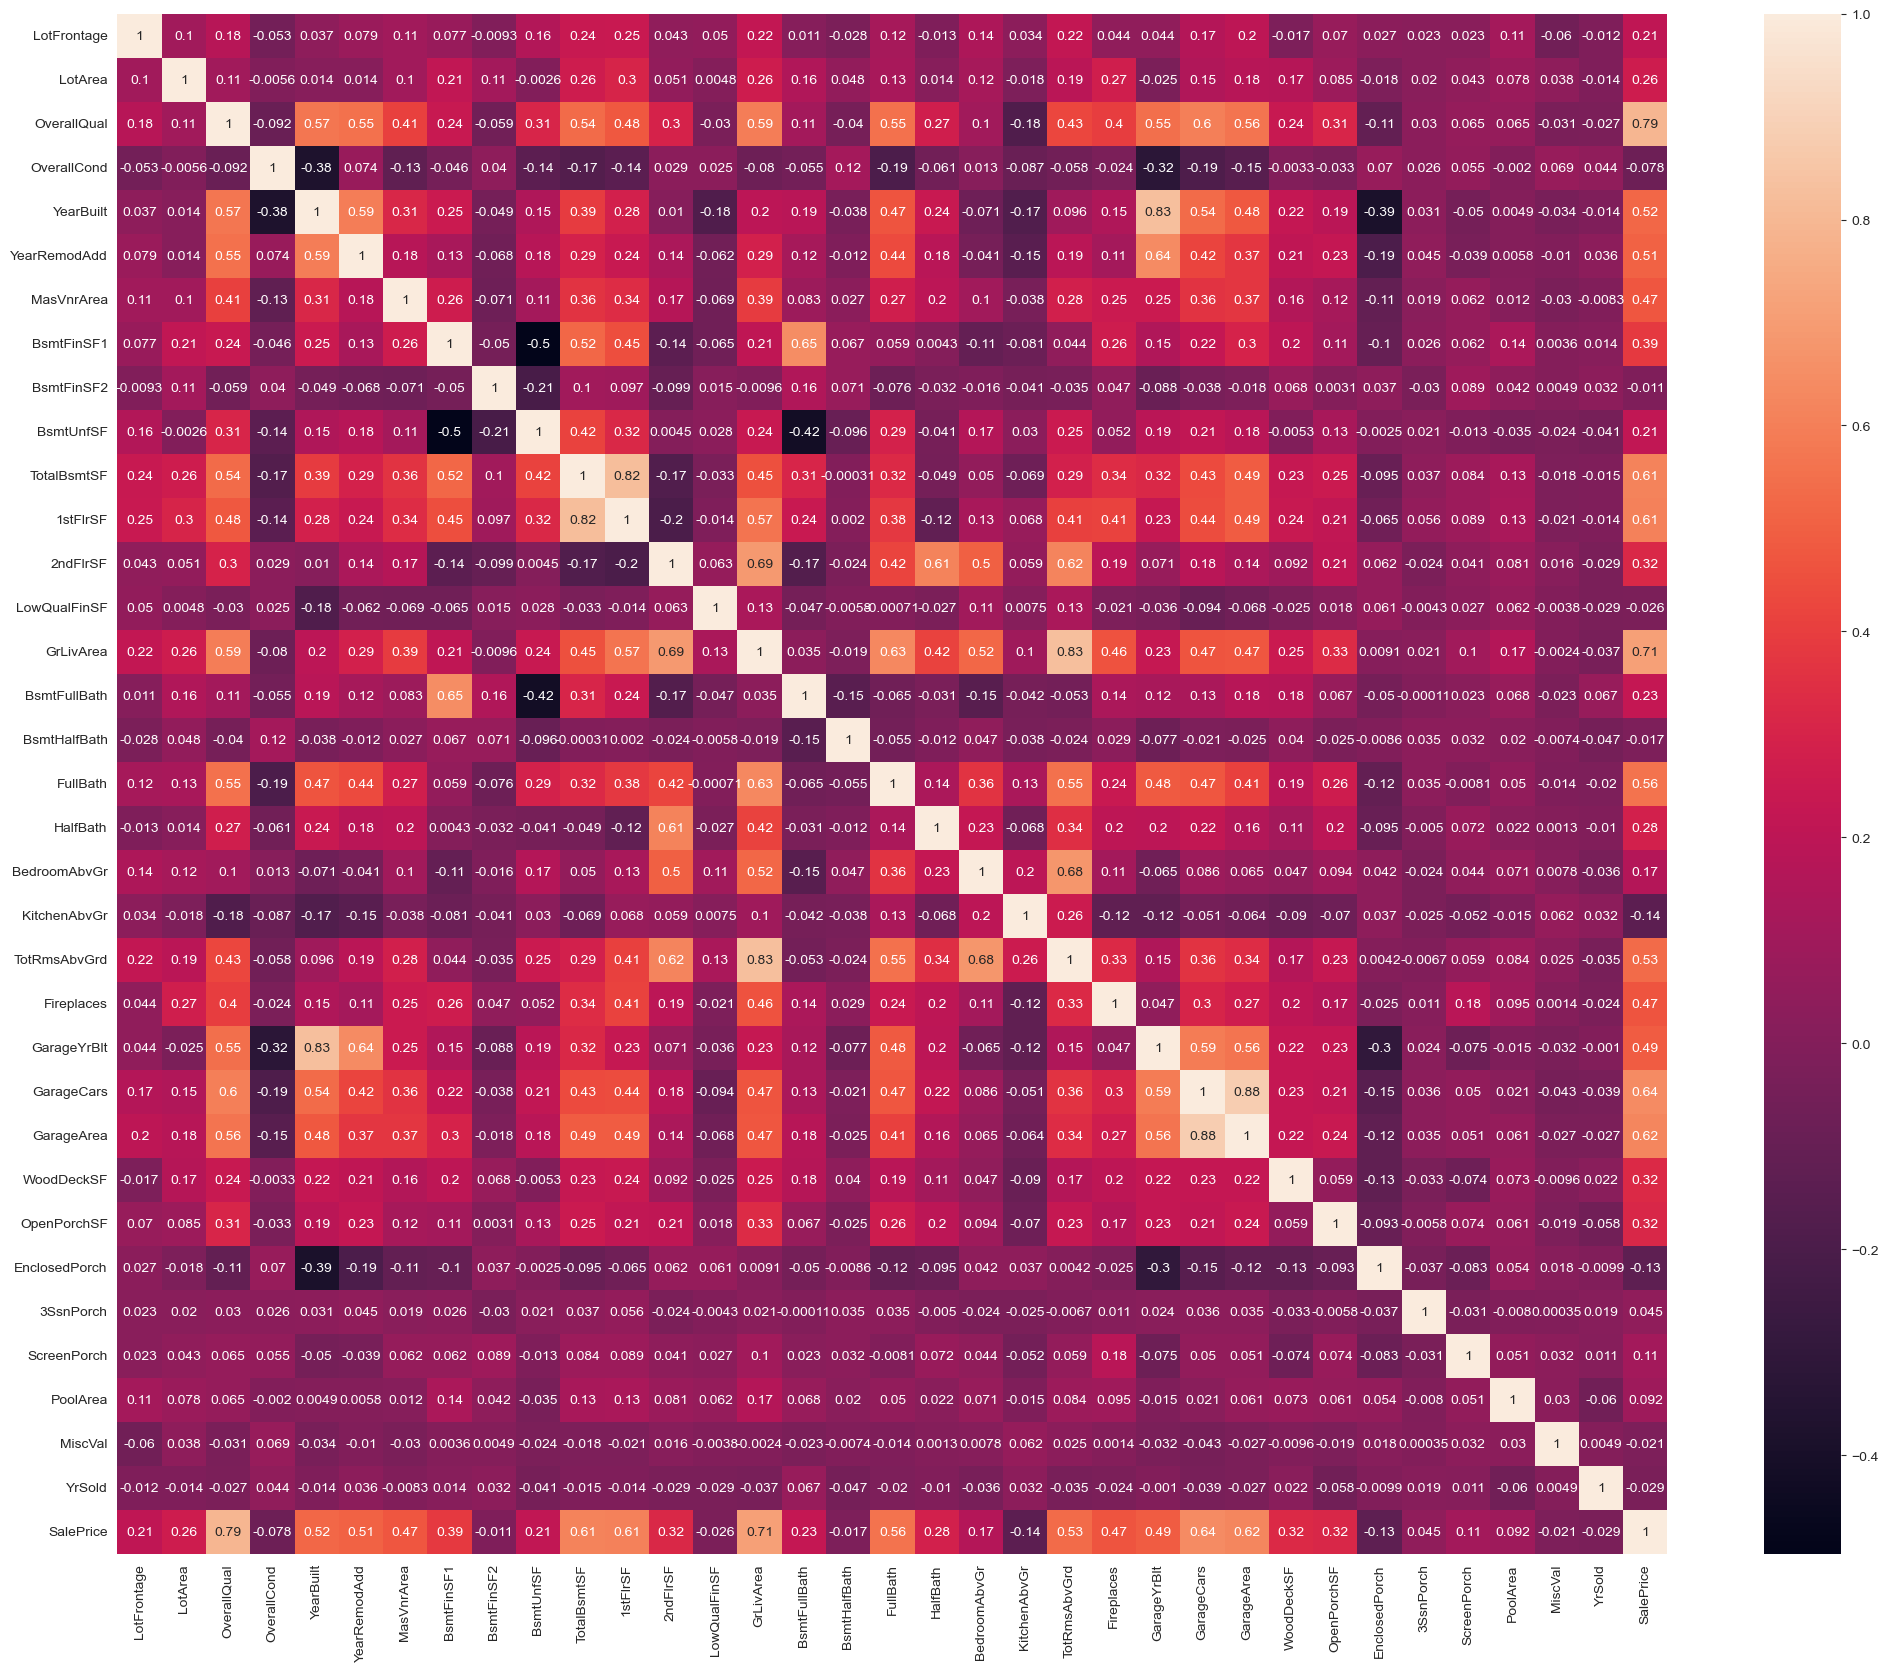

In [70]:
plt.figure(figsize = (25,20))
sns.heatmap(df_numerical.corr(), annot = True)

#### 11. Area Plot

<Axes: >

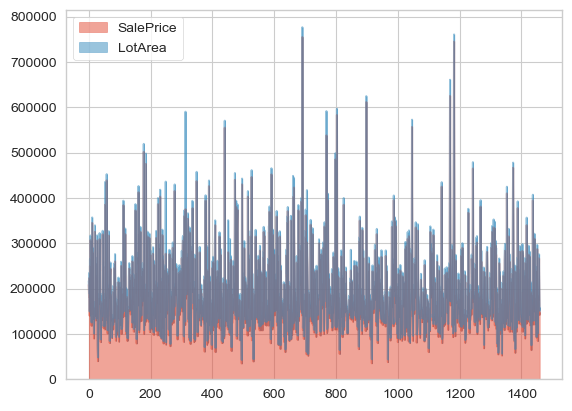

In [81]:
housing_data[['SalePrice','LotArea']].plot(kind = 'area', stacked = True, alpha= 0.5)